In [1]:
# need to import all the library
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from PIL import Image
import os

In [2]:
# preprocess the image 
# put them into the fixed size
def preprocess_image(image_path,target_size=(128,128)):
    image = Image.open(image_path)
    image_resize = image.resize(target_size)
    image_flatten =  np.array(image_resize).flatten()
    return image_flatten


In [3]:
# path specified

dir_name = r"C:\\Users\\Asus\\Desktop\\assignment\\notebook\\data\\dataset_full"
label_name = ["Building","Forest","Glacier","Mountains","Sea","Streets"]

In [4]:
# takling data from each of the directories
X = []
Y = []

for i, class_name in enumerate(label_name):
    class_dir = os.path.join(dir_name, class_name)
    # Iterate over each image file in the class directory
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        # Preprocess image and append to X
        X.append(preprocess_image(image_path))
        # Append class index (label) to y
        Y.append(i)

In [5]:
# now we have  the data just do the train test split 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=35,test_size=.30)

In [6]:
randomforest = RandomForestClassifier(random_state=42)

In [7]:
randomforest  = RandomForestClassifier(n_estimators=100,random_state=42)
randomforest.fit(X_train,Y_train)
pred = randomforest.predict(X_test)
acc = accuracy_score(Y_test,pred)

In [8]:
print(acc)

0.7096569250317663


In [9]:
import joblib

In [10]:
joblib.dump(randomforest,"rf_model1.pkl")

['rf_model1.pkl']

In [16]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [26]:
image_path = r"C:\Users\Asus\Desktop\assignment\notebook\data\dataset_full\Mountains\816.jpg"
image = Image.open(image_path)
image = np.array(image)

In [27]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Histogram Equalization using OpenCV
equalized_image = cv2.equalizeHist(gray_image)
    
    # Apply Gaussian Blur for Image Smoothing using OpenCV
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

In [28]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

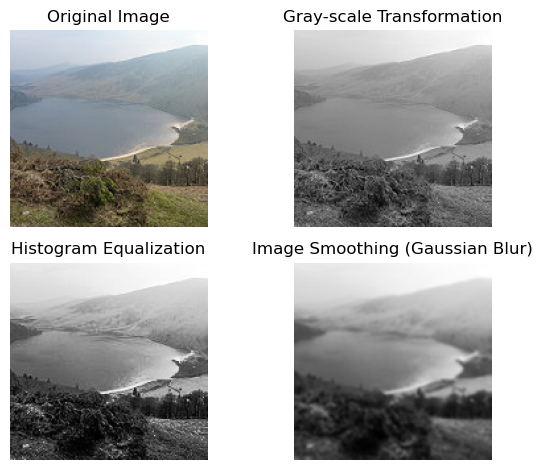

In [29]:
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Gray-scale Transformation")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(blurred_image, cmap='gray')
plt.title("Image Smoothing (Gaussian Blur)")
plt.axis('off')

plt.tight_layout()
plt.show()